In [9]:
pip install pandas numpy matplotlib seaborn networkx 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
# Import necessary Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

# Load the dataset from OECD STIP Survey with error handling
url = "https://stip.oecd.org/assets/downloads/STIP_Survey.csv"

# Use low_memory=False to handle parsing issues and add error handling
try:
    stip_survey = pd.read_csv(url, sep="|", low_memory=False)
    print("Data loaded successfully!")
except Exception as e:
    print(f"Error loading data: {e}")
    print("Trying alternative approach...")
    
    # Alternative approach with different parameters
    try:
        stip_survey = pd.read_csv(url, sep="|", low_memory=False, on_bad_lines='skip')
        print("Data loaded with error handling!")
    except Exception as e2:
        print(f"Alternative approach also failed: {e2}")
        raise

# Display basic information about the dataset
print("\nNumber of rows in the dataset:", len(stip_survey))
print("\nFirst 5 rows of the dataset:")
print(stip_survey.head())

Error loading data: Error tokenizing data. C error: Expected 519 fields in line 15823, saw 520

Trying alternative approach...
Data loaded with error handling!

Number of rows in the dataset: 13905

First 5 rows of the dataset:
                                        InitiativeID          SurveyYear  \
0                              Policy Initiative URI  Year of the survey   
1  http://stip.oecd.org/2025/data/policyInitiativ...                2025   
2  http://stip.oecd.org/2025/data/policyInitiativ...                2025   
3  http://stip.oecd.org/2025/data/policyInitiativ...                2025   
4  http://stip.oecd.org/2025/data/policyInitiativ...                2025   

               CreatedInSurvey                  LastModifiedInSurvey  \
0  Creation date in the survey  Last modification date in the survey   
1         2017-07-31T12:11:38Z                  2024-06-21T08:15:42Z   
2         2017-07-31T12:11:38Z                  2024-06-21T08:15:42Z   
3         2017-07-31T12:36:

In [8]:
#To facilitate working with the dataset, we generate a separate 'Codebook' dataframe listing the column names and the detail given in the first row, for variables on themes and direct beneficiaries

# 1. Get column names (Code) and the first row (Meaning) from the DataFrame
columns = stip_survey.columns
meanings = stip_survey.iloc[0].values

# 2. Create a DataFrame pairing each column name with its description
codebook = pd.DataFrame({
    "Code": columns,
    "Meaning": meanings
})

# 3. Filter only columns whose names start with "TH" or "TG" (policy themes and direct beneficiaries)
codebook = codebook[codebook["Code"].str.match(r"^TH|^TG")].reset_index(drop=True)

# 4. Display the first 10 rows of the codebook
codebook.head(10)

,Code,Meaning
0,TH101,0
1,TH102,0
2,TH103,0
3,TH104,0
4,TH105,0
5,TH106,0
6,TH107,0
7,TH108,0
8,TH109,0
9,TH13,0


In [11]:
# Data preprocessing
# Remove the description row to keep only observational data
stip_survey = stip_survey.iloc[1:].reset_index(drop=True)

# Convert theme and target group columns to numeric format
th_tg_cols = [col for col in stip_survey.columns if col.startswith('TH') or col.startswith('TG')]
stip_survey[th_tg_cols] = stip_survey[th_tg_cols].apply(pd.to_numeric, errors='coerce').fillna(0)

# Create a separate DataFrame with unique initiatives only
stip_survey_unique = stip_survey.drop_duplicates(subset=['InitiativeID']).copy()

print("Data loaded and prepared.")
print(f"Total policy instruments (rows): {len(stip_survey)}")
print(f"Total unique policy initiatives: {len(stip_survey_unique)}")
stip_survey_unique.head()

Data loaded and prepared.
Total policy instruments (rows): 13904
Total unique policy initiatives: 9431


,InitiativeID,SurveyYear,CreatedInSurvey,LastModifiedInSurvey,NameEnglish,CountryLabel,CountryCode,NameOriginalLanguage,Acronym,StartDateYear,...,F9:V294,F9:V295,F98:V670,F98:V671,F98:V672,F98:V673,F99:V674,F99:V675,F99:V676,F99:V677
0,http://stip.oecd.org/2025/data/policyInitiativ...,2025,2017-07-31T12:11:38Z,2024-06-21T08:15:42Z,INTER,Luxembourg,LUX,NaN,NaN,2006,...,0,0,0,1,0,0,0,0,0,1
2,http://stip.oecd.org/2025/data/policyInitiativ...,2025,2017-07-31T12:36:36Z,2023-02-06T21:06:10Z,CORE,Luxembourg,LUX,NaN,NaN,2007,...,0,0,0,0,0,0,0,0,0,0
3,http://stip.oecd.org/2025/data/policyInitiativ...,2025,2017-07-31T14:20:00Z,2023-02-06T21:06:00Z,Open Access Fund,Luxembourg,LUX,Open Access Fund,NaN,2017,...,0,0,0,0,0,0,0,0,0,0
5,http://stip.oecd.org/2025/data/policyInitiativ...,2025,2017-07-31T14:40:34Z,2023-06-07T17:03:59Z,Integrated BioBank of Luxembourg,Luxembourg,LUX,NaN,IBBL,2010,...,0,0,0,0,0,0,0,0,0,0
6,http://stip.oecd.org/2025/data/policyInitiativ...,2025,2017-07-31T15:24:56Z,2023-02-06T21:06:11Z,THE 3RD INDUSTRIAL REVOLUTION STRATEGY,Luxembourg,LUX,"Etude stratégique """"Troisième Révolution Indus...",NaN,2016,...,0,0,0,0,0,0,0,0,0,0


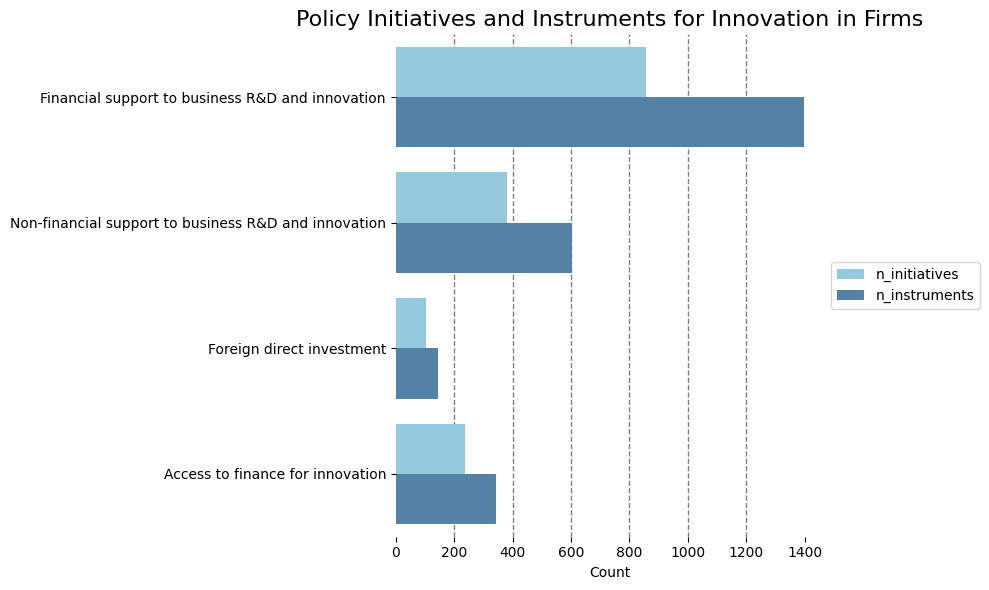

In [11]:

# --- 1. Remove columns that start with "F" (make a copy to avoid SettingWithCopyWarning) ---
financing_innovation = stip_survey.loc[:, ~stip_survey.columns.str.startswith('F')].copy()

# --- 2. Filter rows where at least one of the target themes is present ---
theme_cols = ['TH31', 'TH32', 'TH36', 'TH38']
# Ensure theme columns are numeric
financing_innovation[theme_cols] = financing_innovation[theme_cols].apply(pd.to_numeric, errors='coerce')
# Keep rows where the sum of these columns is greater than 0
financing_innovation = financing_innovation[financing_innovation[theme_cols].sum(axis=1) > 0]

# --- 3. Reshape to long format for the four themes ---
financing_long = financing_innovation.melt(
    id_vars=[col for col in financing_innovation.columns if col not in theme_cols],
    value_vars=theme_cols,
    var_name='Theme',
    value_name='value'
)
# Keep only rows where the theme is present (value == 1)
financing_long = financing_long[financing_long['value'] == 1]

# --- 4. Count the number of instruments per InitiativeID and Theme ---
grouped = financing_long.groupby(['InitiativeID', 'Theme']).size().reset_index(name='n_instruments')

# --- 5. For each Theme, keep only unique InitiativeID and summarize ---
unique_initiatives = grouped.drop_duplicates(subset=['Theme', 'InitiativeID'])
summary = unique_initiatives.groupby('Theme').agg(
    n_initiatives=('InitiativeID', 'nunique'),
    n_instruments=('n_instruments', 'sum')
).reset_index()
# --- 6. Map theme codes to descriptive labels for plotting ---
theme_labels = {
    'TH31': 'Financial support to business R&D and innovation',
    'TH32': 'Non-financial support to business R&D and innovation',
    'TH36': 'Foreign direct investment',
    'TH38': 'Access to finance for innovation'
}
summary['Theme_label'] = summary['Theme'].map(theme_labels)

# --- 7. Reshape summary for plotting (long format) ---
plot_df = pd.melt(
    summary,
    id_vars='Theme_label',
    value_vars=['n_initiatives', 'n_instruments'],
    var_name='Type',
    value_name='Count'
)

# --- 8. Plot grouped horizontal bar chart ---
plt.figure(figsize=(10, 6))
sns.barplot(
    data=plot_df,
    y='Theme_label',
    x='Count',
    hue='Type',
    palette=['skyblue', 'steelblue']
)
for x in [200, 400, 600, 800, 1000,1200]:
    plt.axvline(x, color='gray', linestyle='--', lw=1, zorder=0)
sns.despine(left=True, bottom=True)

plt.title('Policy Initiatives and Instruments for Innovation in Firms', fontsize=16)
plt.xlabel('Count')
plt.ylabel('')
plt.legend(title='', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

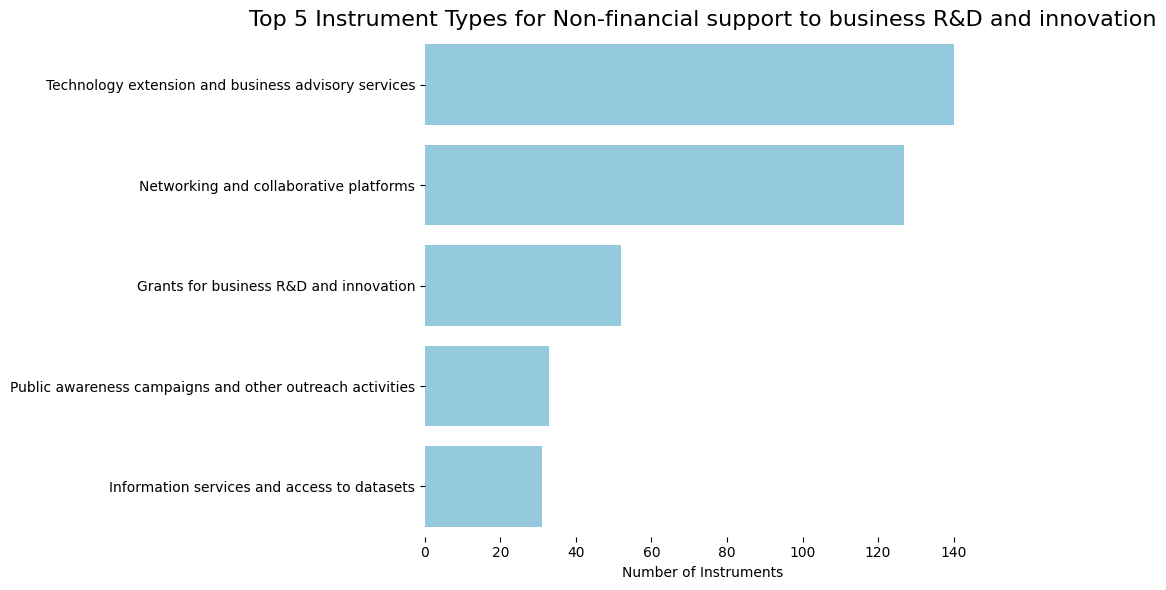

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Remove columns that start with "F"
th32_instruments = stip_survey.loc[:, ~stip_survey.columns.str.startswith('F')]

# 2. Filter rows where TH32 > 0 (ignore non-numeric rows)
th32_instruments = th32_instruments[
    pd.to_numeric(th32_instruments['TH32'], errors='coerce') > 0
]

# 3. Group by 'InstrumentTypeLabel' and count occurrences
th32_instruments = (
    th32_instruments
    .groupby('InstrumentTypeLabel')
    .size()
    .reset_index(name='n')
)

# 4. Get the top 5 by count, descending order
th32_instruments = th32_instruments.nlargest(5, 'n').sort_values('n', ascending=False)

# 5. Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=th32_instruments,
    y='InstrumentTypeLabel',
    x='n',
    color='skyblue'
)
sns.despine(left=True, bottom=True)
plt.title('Top 5 Instrument Types for Non-financial support to business R&D and innovation', fontsize=16)
plt.xlabel('Number of Instruments')
plt.ylabel('')
plt.tight_layout()
plt.show()

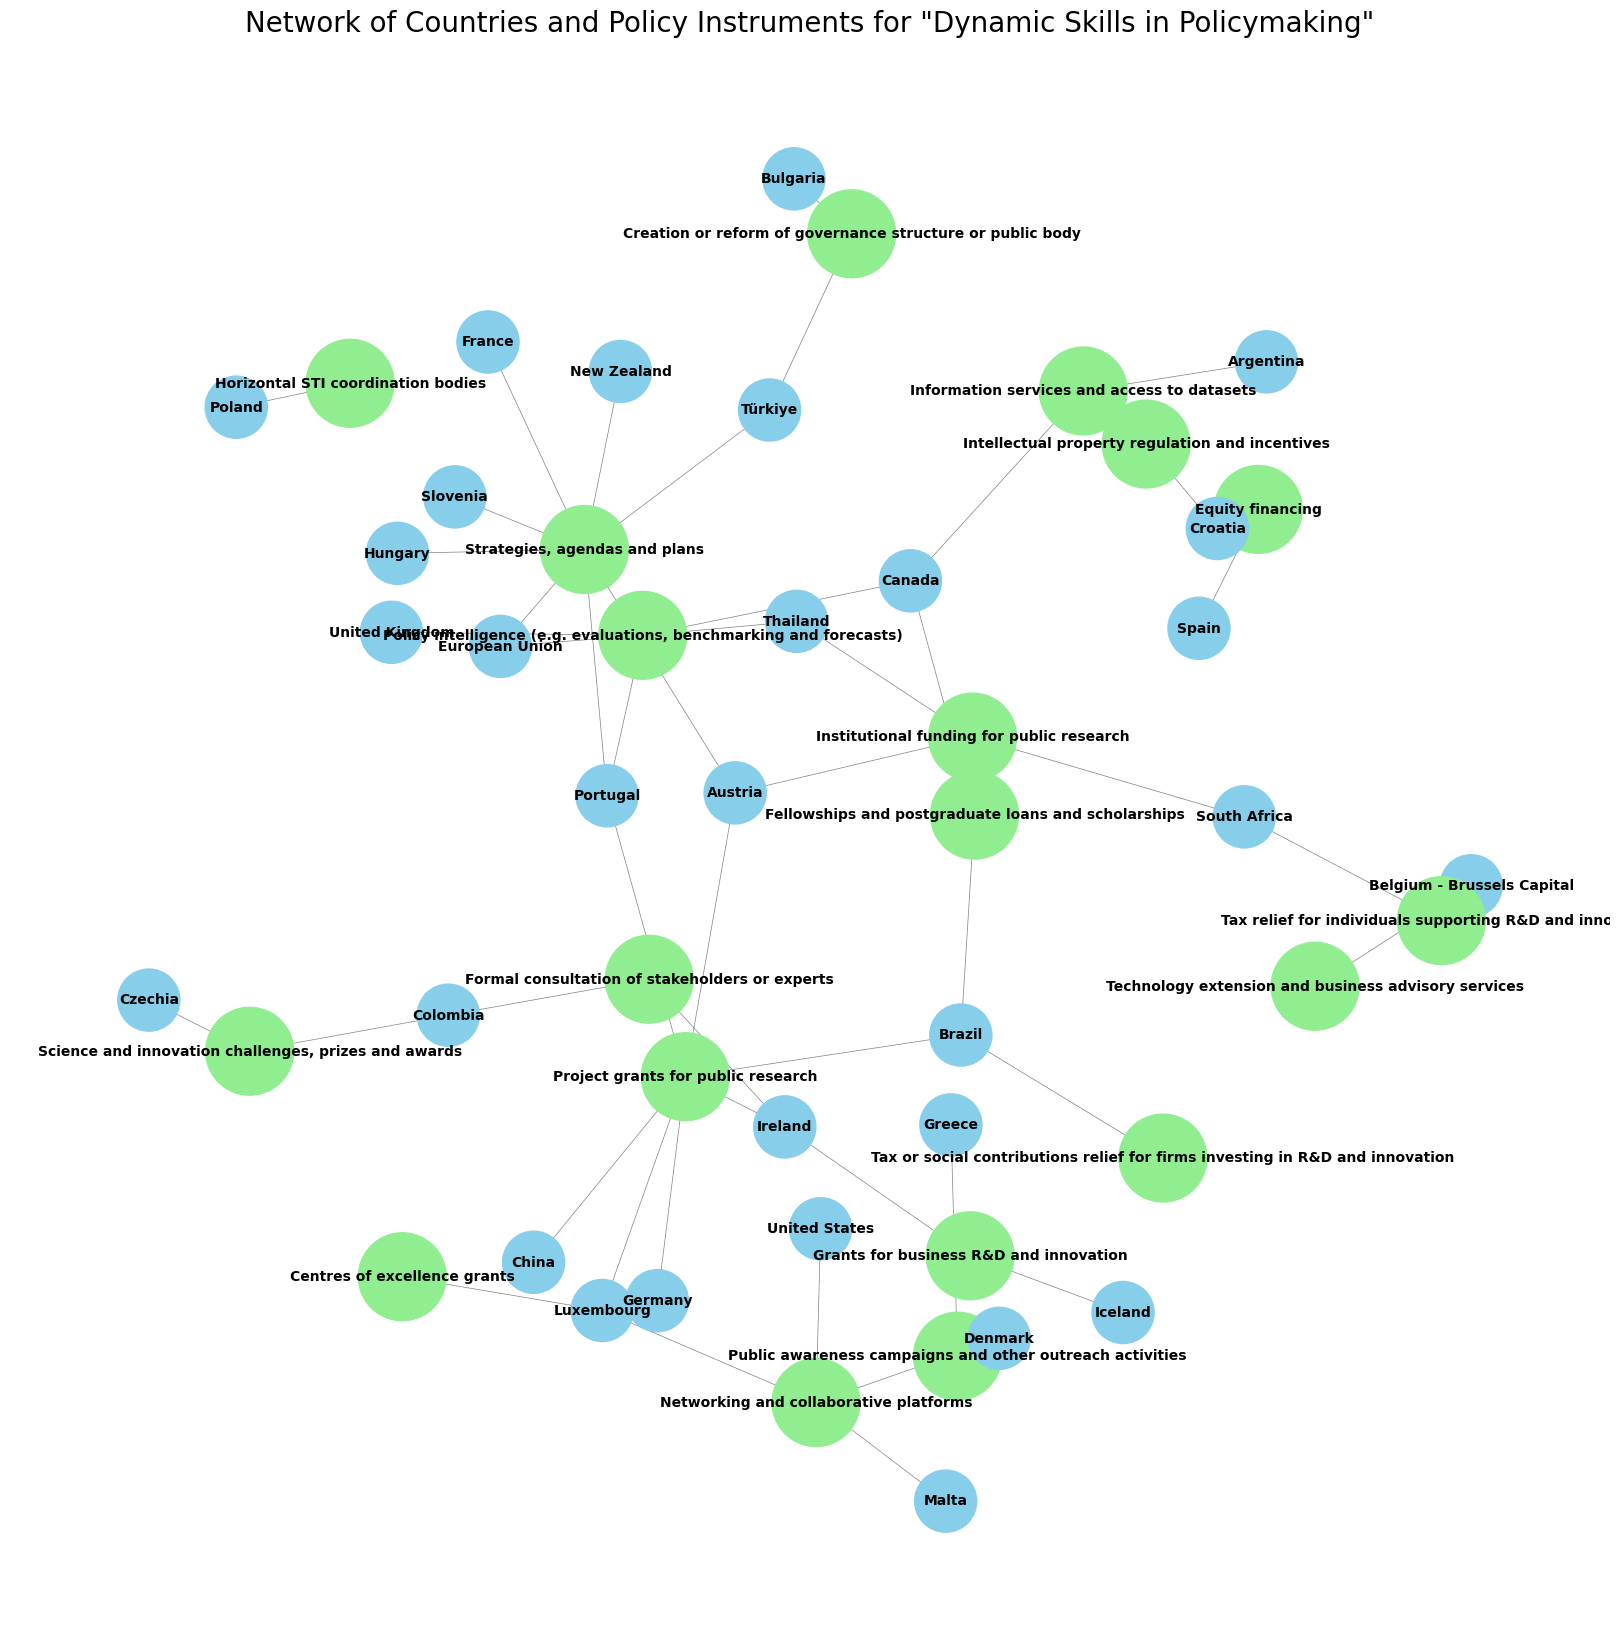

In [18]:


import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# --- HYPOTHETICAL ANALYSIS FOR 2025 DATA ---

# We will use the full `stip_survey` DataFrame because we are interested in the
# relationship between each initiative and its specific instruments.

# Let's assume the new theme "Dynamic skills and capabilities for policymaking" has the code 'TH16'.
# To make this example runnable, we'll first simulate this column if it doesn't exist.
if 'TH16' not in stip_survey.columns:
    # Create a small, random sample of initiatives for this theme to make the graph readable
    np.random.seed(42) # for reproducibility
    stip_survey['TH16'] = 0
    sample_indices = np.random.choice(stip_survey.index, 50, replace=False)
    stip_survey.loc[sample_indices, 'TH16'] = 1

# 1. Filter for instruments belonging to initiatives with the target theme.
dynamic_skills_instruments = stip_survey[stip_survey['TH16'] == 1]

# 2. Create a DataFrame of the relationships (edges) between countries and instruments.
#    We drop any rows with missing values in these key columns.
edges = dynamic_skills_instruments[['CountryLabel', 'InstrumentTypeLabel']].dropna().reset_index(drop=True)

# 3. Create a graph object from this list of edges using the networkx library.
G = nx.from_pandas_edgelist(edges, source='CountryLabel', target='InstrumentTypeLabel')

# 4. Prepare for plotting by defining node properties.
plt.figure(figsize=(16, 16)) # Use a large figure size for clarity
pos = nx.spring_layout(G, k=0.4, iterations=50) # Position nodes using a force-directed layout

# Differentiate nodes by type (country vs. instrument) for better visual interpretation.
node_colors = []
node_sizes = []
country_nodes = edges['CountryLabel'].unique()

for node in G.nodes():
    if node in country_nodes:
        node_colors.append('skyblue') # Color for countries
        node_sizes.append(2000)
    else:
        node_colors.append('lightgreen') # Color for instruments
        node_sizes.append(4000) # Larger nodes for instrument labels

# 5. Draw the network graph.
nx.draw(G, pos, 
        with_labels=True, 
        node_color=node_colors, 
        node_size=node_sizes,
        font_size=10, 
        font_weight='bold', 
        edge_color='gray',
        width=0.5)

plt.title('Network of Countries and Policy Instruments for "Dynamic Skills in Policymaking"', size=20)
plt.show()


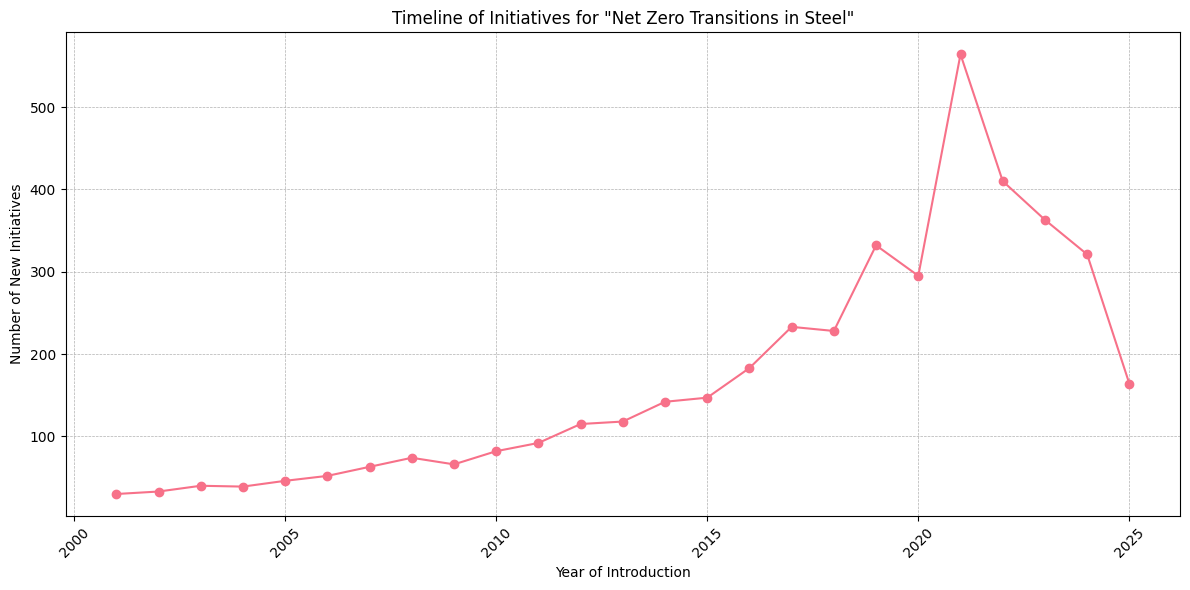

In [13]:
# --- HYPOTHETICAL ANALYSIS FOR 2025 DATA ---

# Assume the theme code for "Net zero transitions in steel" is 'TH110'
steel_theme_code = 'TH76'

# Simulate the new theme column in our unique initiatives DataFrame
if steel_theme_code not in stip_survey_unique.columns:
    stip_survey_unique[steel_theme_code] = np.random.randint(0, 2, size=len(stip_survey_unique))

# Filter for initiatives related to the steel theme
steel_initiatives = stip_survey_unique[stip_survey_unique[steel_theme_code] == 1].copy()

# Convert 'StartDateYear' to a numeric type, coercing errors to NaN
steel_initiatives['StartDateYear'] = pd.to_numeric(steel_initiatives['StartDateYear'], errors='coerce')

# Drop rows where the start year is missing and filter for a reasonable time frame
steel_initiatives.dropna(subset=['StartDateYear'], inplace=True)
steel_initiatives = steel_initiatives[steel_initiatives['StartDateYear'] > 2000]

# Count the number of new initiatives per year
timeline_data = steel_initiatives['StartDateYear'].value_counts().sort_index()

# Create the timeline plot
plt.figure(figsize=(12, 6))
plt.plot(timeline_data.index, timeline_data.values, marker='o', linestyle='-')
plt.title('Timeline of Initiatives for "Net Zero Transitions in Steel"')
plt.xlabel('Year of Introduction')
plt.ylabel('Number of New Initiatives')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
 # Generate descriptive statistics for key year columns 
print(stip_survey[['SurveyYear', 'StartDateYear', 'EndDateYear']].describe())

 # Generate descriptive statistics for key year columns     
 # Count the number of unique policy initiatives per country 
# We use the 'stip_survey_unique' DataFrame to avoid overcounting 
top_countries = stip_survey_unique['CountryLabel'].value_counts() 
 
# Display the top 10 countries 
print(top_countries.head(10))

        SurveyYear  StartDateYear  EndDateYear
count        10728        10386.0       2057.0
unique           2          149.0         38.0
top           2023         2021.0       2023.0
freq          9705         1321.0        471.0
CountryLabel
Portugal          360
Türkiye           329
United States     289
Germany           282
Poland            279
Korea             275
United Kingdom    264
Spain             254
Canada            232
Australia         205
Name: count, dtype: int64
